In [1]:
import pandas as pd
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [15]:
df_industries = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam-Industry.xlsx', index_col='Date')
df_market = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam–Market.xlsx', index_col='Date')
# df_risk_factors = pd.read_excel('./data/Risk_Factors.xlsx', index_col='Date')

# Question

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio. Using monthly excess returns for the five industry portfolios:

Calculate and report the risk premium and the standard deviation of (excess) return, for the five industry portfolios and the global minimum-variance portfolio.



In [41]:
print("mean excess returns")
df_industries.mean()

mean excess returns


Cnsmr    1.449167
Manuf    1.108889
HiTec    1.672361
Hlth     1.452083
Other    1.366389
dtype: float64

In [42]:
print("standard deviation of  excess returns")
df_industries.std()

standard deviation of  excess returns


Cnsmr    3.114793
Manuf    3.935195
HiTec    3.787931
Hlth     3.601339
Other    4.314297
dtype: float64

Plot the minimum-variance frontier (without riskless asset) generated by the five industry portfolios, with risk premium on the vertical axis and standard deviation of (excess) return on the horizontal axis. This graph must cover the range from 0% to 3% per month, in increments of 0.1% (or less), on the vertical axis.

Using a suitable value for the y-intercept, plot the efficient frontier generated by the five industry portfolios with the riskless asset, on the same graph as the minimum-variance frontier.

Calculate and report the Sharpe ratio and portfolio weights for the "tangency" portfolio where the two frontiers intersect.

In [ ]:
deviations = df_industries.values   # R_i - R_f, 
R = np.mean(deviations,   # and get mean deviation
            axis=0)
tracking_error = np.std(deviations,   # and get mean deviation
            axis=0)

pd.DataFrame(
            {'Mean Monthly Deviation %': R,
             'std of returns': tracking_error},
            index=df_industries.columns    
            )

,Mean Monthly Deviation %,tracking error
Cnsmr,1.449167,3.093087
Manuf,1.108889,3.907772
HiTec,1.672361,3.761534
Hlth,1.452083,3.576243
Other,1.366389,4.284232


In [ ]:
deviations = df_industries.values   # R_i - R_f, 
R = np.mean(deviations,   # and get mean deviation
            axis=0)
tracking_error = np.std(deviations,   # and get mean deviation
            axis=0)

pd.DataFrame(
            {'Mean Monthly Deviation %': R,
             'std of returns': tracking_error},
            index=df_industries.columns    
            )

,Mean Monthly Deviation %,tracking error
Cnsmr,1.449167,3.093087
Manuf,1.108889,3.907772
HiTec,1.672361,3.761534
Hlth,1.452083,3.576243
Other,1.366389,4.284232


In [44]:
V = np.cov(deviations,rowvar=False)     # get cov matrix

pd.DataFrame(
            V,
            columns=df_industries.columns,    
            index=df_industries.columns    
            ).round(4)

,Cnsmr,Manuf,HiTec,Hlth,Other
Cnsmr,9.7019,9.4197,9.5554,7.5718,10.0677
Manuf,9.4197,15.4858,11.7804,8.3238,14.9545
HiTec,9.5554,11.7804,14.3484,8.4722,12.6709
Hlth,7.5718,8.3238,8.4722,12.9696,9.4536
Other,10.0677,14.9545,12.6709,9.4536,18.6132


In [45]:
e = np.ones(len(df_industries.columns)).T
alpha = R.T@np.linalg.inv(V)@e
zeta  = R.T@np.linalg.inv(V)@R
delta = e.T@np.linalg.inv(V)@e
R_mv  = alpha/delta

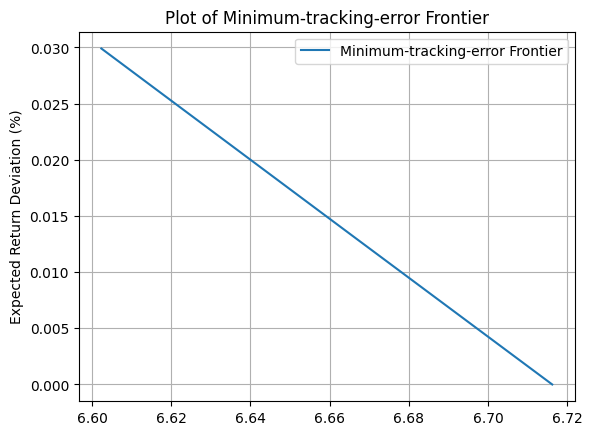

In [51]:
R_deviation = np.arange(0,.03,.0001)
sig_p = (1/delta + delta/(zeta*delta-alpha**2)*(R_deviation-R_mv)**2)**.5

R_f = 0
sig_p_mvf = np.arange(0,.24,.001)
R_p_mvf = R_f + (zeta-2*alpha*R_f+delta*R_f**2)**.5*sig_p_mvf

plt.plot(sig_p, R_deviation, label="Minimum-tracking-error Frontier")
# plt.plot(sig_p_mvf, R_p_mvf, label="Tangency Line")
# plt.xlabel("Tracking Error (%)")  # X-axis label
plt.ylabel("Expected Return Deviation (%)")         # Y-axis label
plt.title("Plot of Minimum-tracking-error Frontier")  # Title of the plot
plt.grid(True)
plt.legend()
plt.show()